In [1]:
import numpy as np
import pandas as pd

In [2]:
import os, re
root_path = re.sub('Stats', 'Dataset'+os.sep, os.getcwd())

In [3]:
noise = pd.read_csv(root_path + 'noise-level.csv')

In [4]:
noise.head()

,Noise Level (in dB)
0,82
1,89
2,94
3,110
4,74


**Percentile**

The sample 100p percentile is defined as
- atleast $np$ percent of the data is less than or equal
- atleast $n(1-p)$ percent of the data is greater than or equal

In [5]:
def percentile(x, p):
    import math
    
    n = x.size
    np = n * p / 100
    i = math.ceil(np) - 1
    
    if np.is_integer():
        return (x[i] + x[i+1]) / 2
    else:
        return x[i]

In [6]:
x = np.sort(noise['Noise Level (in dB)'].values)

In [7]:
x

array([ 60,  65,  65,  68,  69,  72,  74,  74,  75,  77,  78,  82,  83,
        83,  85,  87,  88,  89,  90,  90,  91,  94,  94,  95,  97, 100,
       102, 107, 108, 110, 112, 114, 115, 122, 124, 125])

In [8]:
for p in (1,25,50,75,99):
    print(f"{p}%: {percentile(x,p)}")

1%: 60
25%: 76.0
50%: 89.5
75%: 104.5
99%: 125


**Quantile**

1. first quantile is 25 percentile
2. second quantile is 50 percentile (a.k.a median)
3. third quantile is 75 percentile

In [9]:
import matplotlib.pyplot as plt

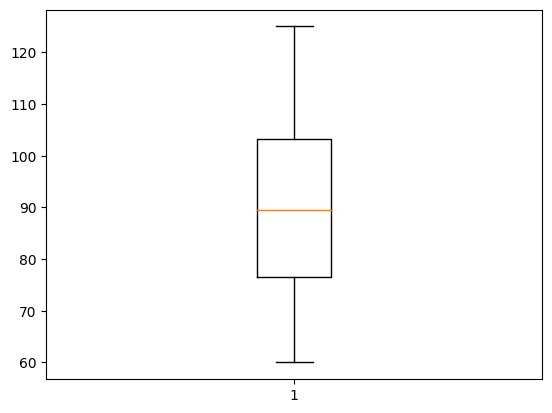

In [10]:
plt.boxplot(x)
plt.show()

**Box-Whisker plot**

The Box Whisker plot is a graphical summary of (min, Q1, Q2, Q3, max)

In [11]:
print(f"Range: {percentile(x,99) - percentile(x,1)}")
print(f"Interquantile Range: {percentile(x,75) - percentile(x,25)}")

Range: 65
Interquantile Range: 28.5
